In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def displayImage(image, title='Original Img', colored=None):
    plt.figure(figsize=(10, 10))
    if colored:
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
    else:
        plt.imshow(image, cmap='gray')
    plt.axis("off")
    plt.title(title)
    plt.show()

def display2Images(img1, img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()


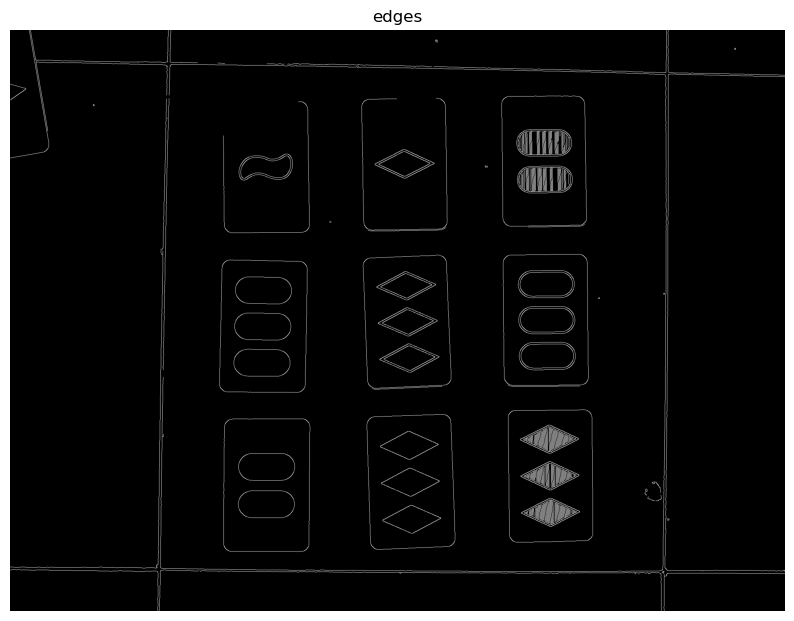

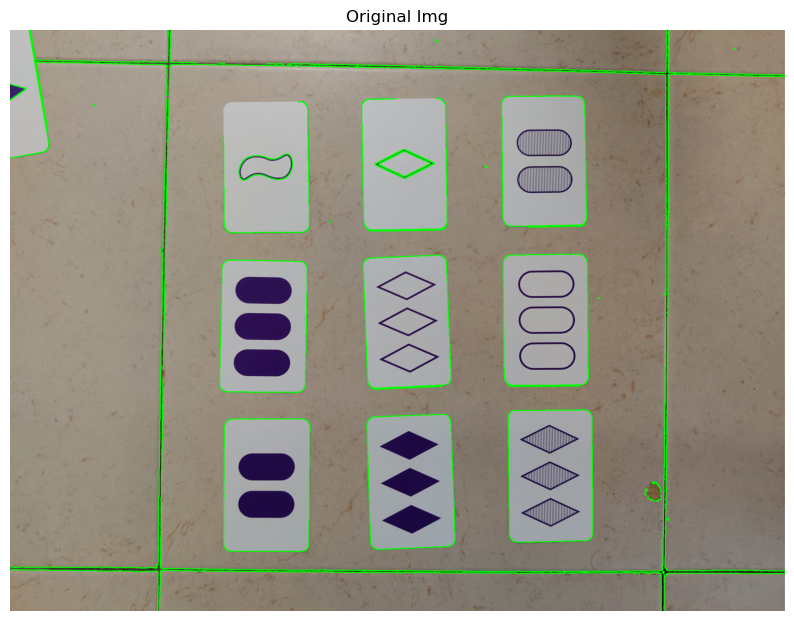

765
112455
6375
355470
55335
131070
4590
7395
7905
3825
9690
16830
21750480


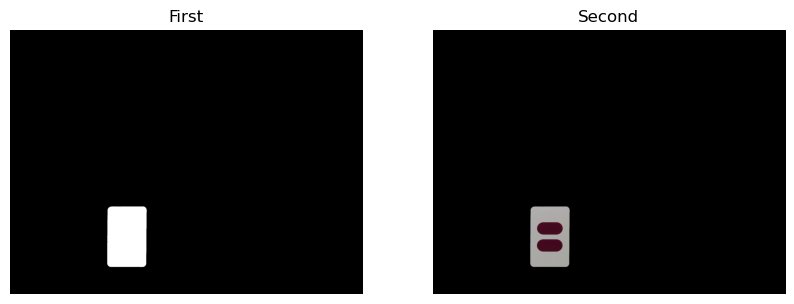

21488850


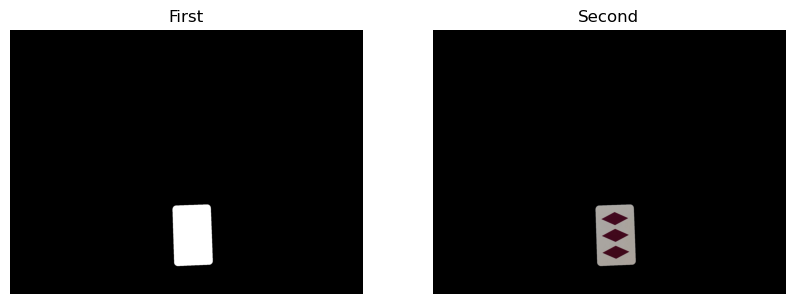

21125475


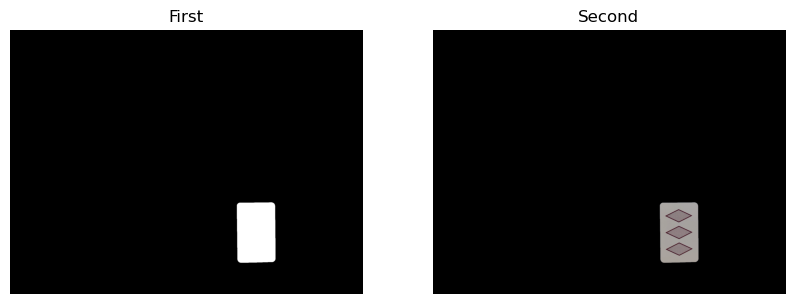

48960
50490
3315
3570
21614310


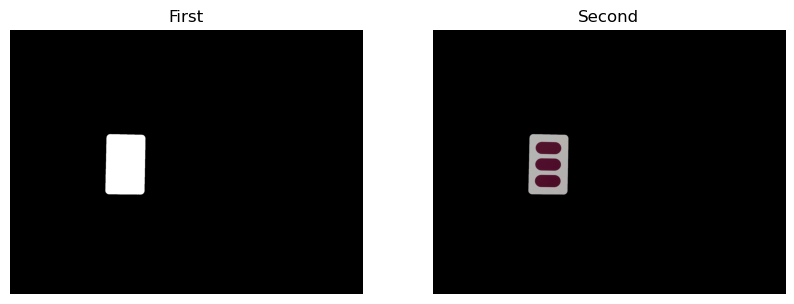

20888070


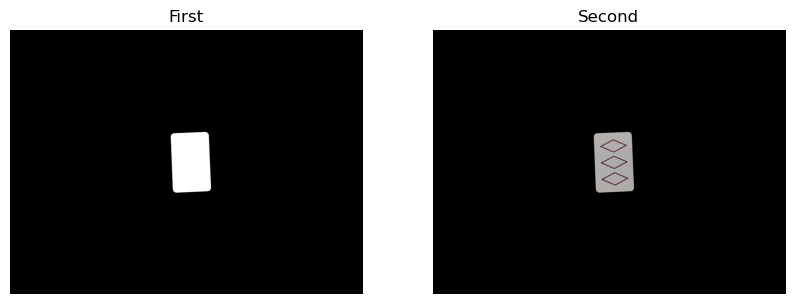

21107115


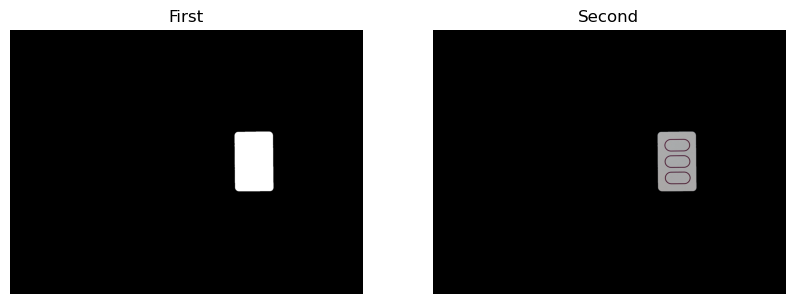

328185
3060
55080
39780
2550
7140
2054535
1317075
121635
255
4335
223125
106080
190740
268770
20743485


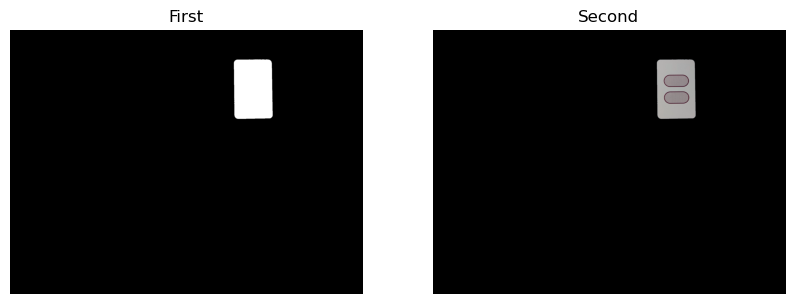

30090
514080
1050345
21165
43350
110415
78285
24990
12240
5100
141015
4335
5865
111690
193035
42585
138210
112455


In [ ]:
# Read the image ----------------------------------------
image = cv2.imread('1.jpg')

# Blur the image to remove noise ------------------------
blurred_image = cv2.GaussianBlur(image.copy(), (5,5), 0)

# Apply canny edge detection -----------------------------
edges = cv2.Canny(blurred_image, 100, 160)

# detecting contours -----------------------------------
contours, _ = cv2.findContours(edges, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

# Draw the contours --------------------------------------
image_copy = image.copy()
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)


# Display the image ---------------------------------------
displayImage(edges, title='edges')
displayImage(image_copy, colored=1)

# Create masks and draw each contour alone  ---------------
for contour in contours:
    # Create empty mask 
    mask = np.zeros(image.shape[:2], np.uint8)
    
    # Draw each contour on mask
    cv2.drawContours(mask, [contour],-1, 255, -1)

    # Apply mask to image
    masked = cv2.bitwise_and(image, image, mask=mask)
    sum = np.sum(mask)
    print (sum)

    if sum > 6000000: #this summnig ensure that the countour is a real card or noise, and display it ^_^
        display2Images(mask, masked)

